1. look at variance on ST08Q01, ST09Q01, ST115Q01
2. add EDA
3. apply a regression
4. make something a binomial variable and then apply classification
5. make a separate model for each country then compair by country


Question spreadsheet ID:

* Q8 = ST08Q01 - In the last two full weeks of school, how many times did you arrive late for school?
* Q9 = ST09Q01 - In the last two full weeks of school, how many times did you <skip> a whole school day?
* Q10 = ST115Q01 - In the last two full weeks of school, how many times did you <skip> some classes?
* Q29 - How many hours do you typically spend per week attending <out-of-school-time lessons> in the following subjects?
    * ST55Q01 - "Out of school lessons - <test lang>"
    * ST55Q02 - "Out of school lessons - <maths>"
    * ST55Q03 - "Out of school lessons - <science>"
    * ST55Q04 - "Out of school lessons - other"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.grid_search import GridSearchCV


# Loading the spreadsheets for Q8, Q9, Q10 from student questionaires.

In [4]:
# ST08Q01

ST08Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST08Q01.xls', 
                        skiprows = 1)

# ST09Q01

ST09Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST09Q01.xls', 
                        skiprows = 1)

# ST115Q01

ST115Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST115Q01.xls',
                        skiprows = 1)

## Cleaning headers and values

In [5]:
for x in ST08Q01.columns:
    ST08Q01 = ST08Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'None': 'resp_none_pct',
                                        'None.1': 'resp_none_se',
                                        'One or two times': 'resp_one_or_two_times_pct',
                                        'One or two times.1': 'resp_one_or_two_times_se',
                                        'Three or four times': 'resp_three_or_four_times_pct',
                                        'Three or four times.1': 'resp_three_or_four_times_se',
                                        'Five or more times': 'resp_five_or_more_times_pct',
                                        'Five or more times.1': 'resp_five_or_more__times_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se'
                     })

# Delete the first row since it was inserted into the column headers
for x in ST08Q01:
        ST08Q01 = ST08Q01[ST08Q01.no_of_valid_resp != 'Valid']     


ST08Q01.dropna()

# Delete all Standard Error columns

del ST08Q01['resp_none_se']
del ST08Q01['resp_one_or_two_times_se']
del ST08Q01['resp_three_or_four_times_se']
del ST08Q01['resp_five_or_more__times_se'] 
del ST08Q01['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST08Q01['total_number_of_resp']
del ST08Q01['pct_not_valid']
del ST08Q01['no_of_valid_resp']

In [6]:
for y in ST09Q01.columns:
    ST09Q01 = ST09Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'None': 'resp_none_pct',
                                        'None.1': 'resp_none_se',
                                        'One or two times': 'resp_one_or_two_times_pct',
                                        'One or two times.1': 'resp_one_or_two_times_se',
                                        'Three or four times': 'resp_three_or_four_times_pct',
                                        'Three or four times.1': 'resp_three_or_four_times_se',
                                        'Five or more times': 'resp_five_or_more_times_pct',
                                        'Five or more times.1': 'resp_five_or_more__times_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for y in ST09Q01:
        ST09Q01 = ST09Q01[ST09Q01.no_of_valid_resp != 'Valid'] 
        
# Drop empty rows

ST09Q01.dropna()

# Delete all Standard Error columns

del ST09Q01['resp_none_se']
del ST09Q01['resp_one_or_two_times_se']
del ST09Q01['resp_three_or_four_times_se']
del ST09Q01['resp_five_or_more__times_se'] 
del ST09Q01['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST09Q01['total_number_of_resp']
del ST09Q01['pct_not_valid']
del ST09Q01['no_of_valid_resp']

In [7]:
for z in ST115Q01.columns:
    ST115Q01 = ST115Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'None': 'resp_none_pct',
                                        'None.1': 'resp_none_se',
                                        'One or two times': 'resp_one_or_two_times_pct',
                                        'One or two times.1': 'resp_one_or_two_times_se',
                                        'Three or four times': 'resp_three_or_four_times_pct',
                                        'Three or four times.1': 'resp_three_or_four_times_se',
                                        'Five or more times': 'resp_five_or_more_times_pct',
                                        'Five or more times.1': 'resp_five_or_more__times_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })
    
# Delete the first row since it was inserted into the column headers
for z in ST115Q01:
        ST115Q01 = ST115Q01[ST115Q01.no_of_valid_resp != 'Valid']     

# Drop empty rows

ST115Q01.dropna()

# Delete all Standard Error columns

del ST115Q01['resp_none_se']
del ST115Q01['resp_one_or_two_times_se']
del ST115Q01['resp_three_or_four_times_se']
del ST115Q01['resp_five_or_more__times_se'] 
del ST115Q01['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST115Q01['total_number_of_resp']
del ST115Q01['pct_not_valid']
del ST115Q01['no_of_valid_resp']

In [8]:
print ST08Q01.shape, ST09Q01.shape, ST115Q01.shape

(46, 6) (46, 6) (46, 6)


In [9]:
ST08Q01['q_id'] = 'ST08Q01'
ST09Q01['q_id'] = 'ST09Q01'
ST115Q01['q_id'] = 'ST115Q01'

In [10]:
stu_late_skip = pd.concat([ST08Q01, ST09Q01, ST115Q01], axis=0)

In [11]:
stu_late_skip.head()

,cnt,resp_none_pct,resp_one_or_two_times_pct,resp_three_or_four_times_pct,resp_five_or_more_times_pct,pct__resp_missing,q_id
1,Australia,64.2132,25.3104,6.5746,3.52282,0.378915,ST08Q01
2,Austria,78.9024,15.5747,3.21683,2.02188,0.284139,ST08Q01
3,Belgium,72.489,20.7482,3.70374,2.83237,0.226746,ST08Q01
4,Canada,56.2731,28.2667,9.09058,5.33361,1.03601,ST08Q01
5,Chile,46.8541,34.8501,10.4788,7.52486,0.292178,ST08Q01


In [12]:
for col in stu_late_skip.columns:
    if not col in ['cnt','q_id']:
        stu_late_skip[col] = stu_late_skip[col].map(lambda x: float(x))

In [13]:
#stu_late_skip = stu_late_skip.groupby('cnt')

In [14]:
stu_late_skip.columns.tolist()

['cnt',
 'resp_none_pct',
 'resp_one_or_two_times_pct',
 'resp_three_or_four_times_pct',
 'resp_five_or_more_times_pct',
 'pct__resp_missing',
 'q_id']

ST08Q01
ST09Q01
ST115Q01


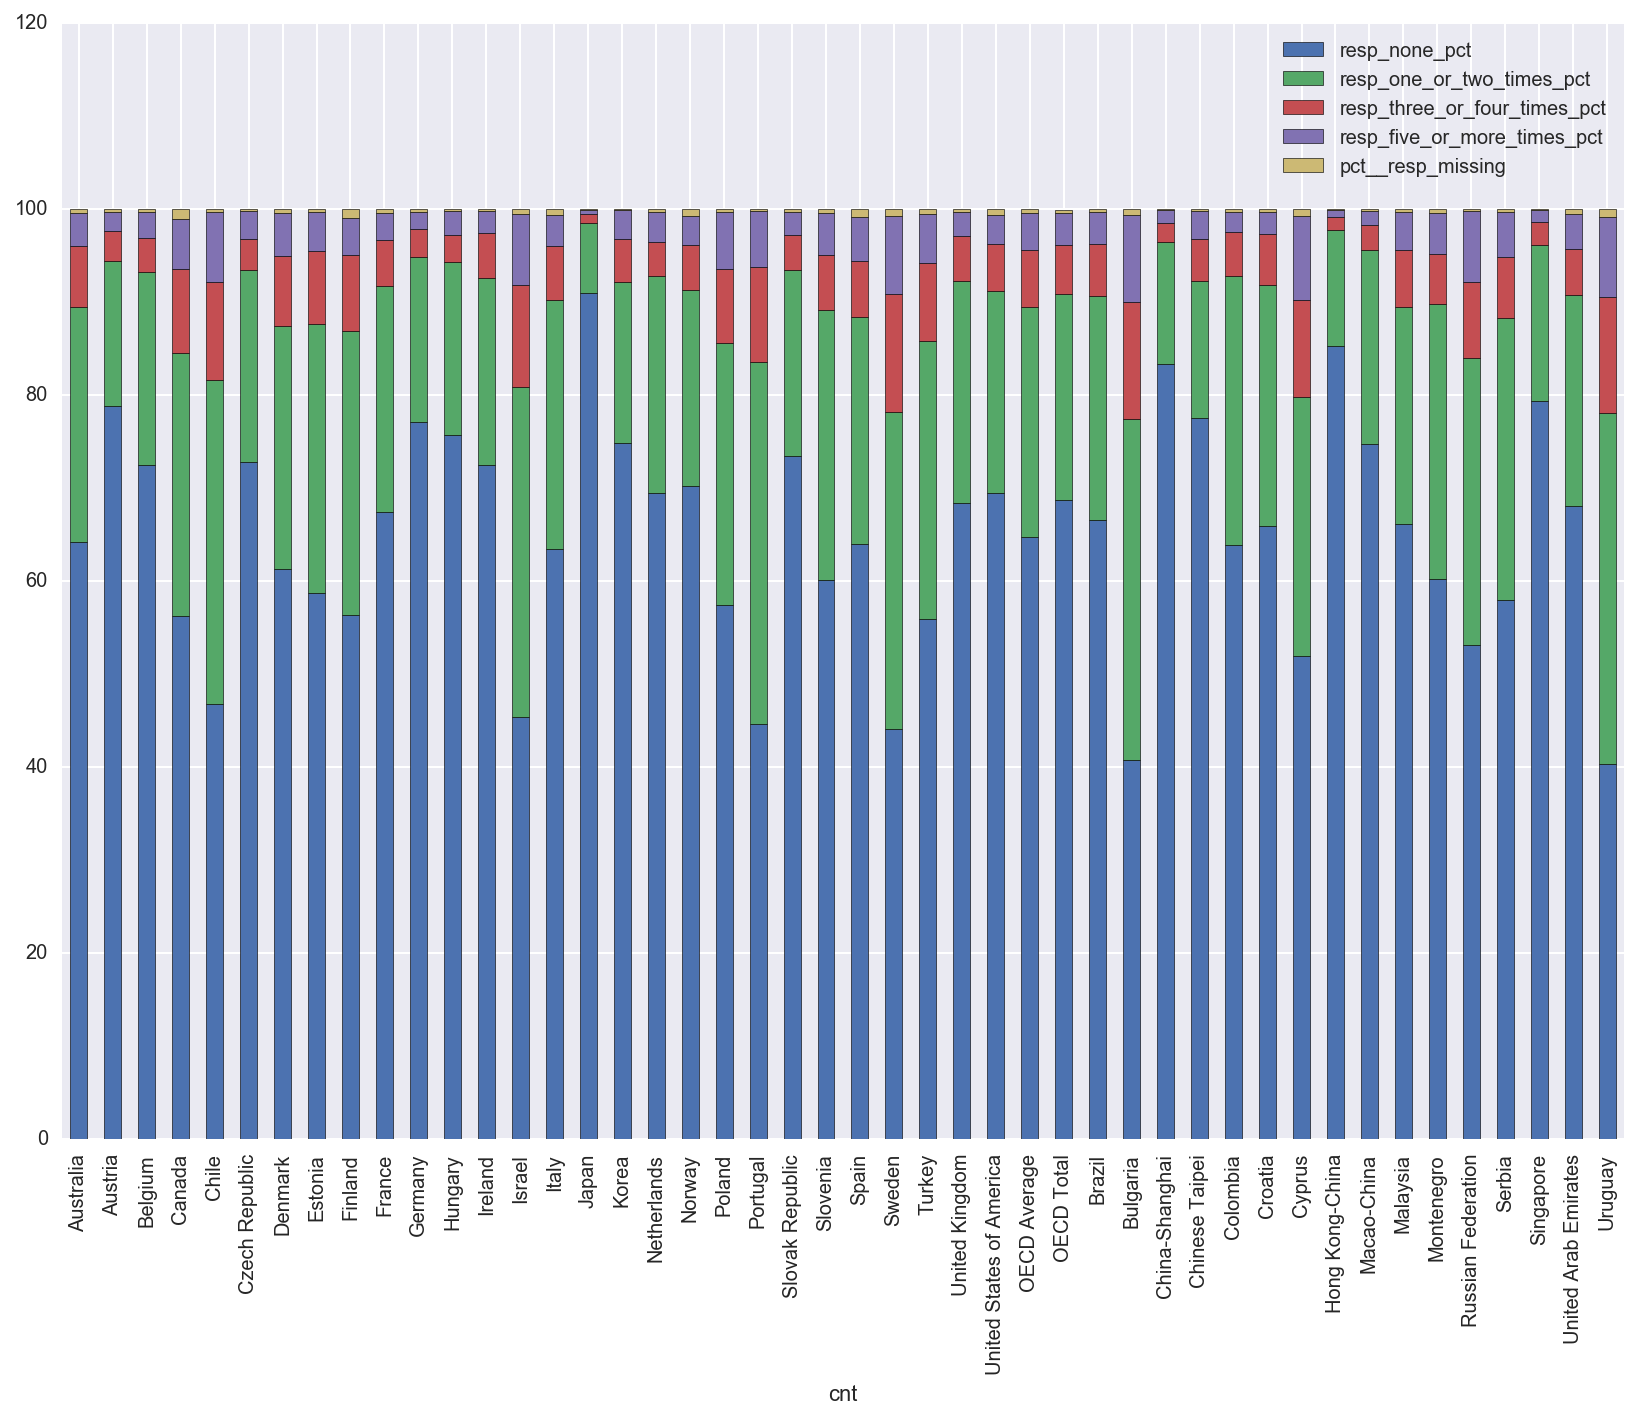

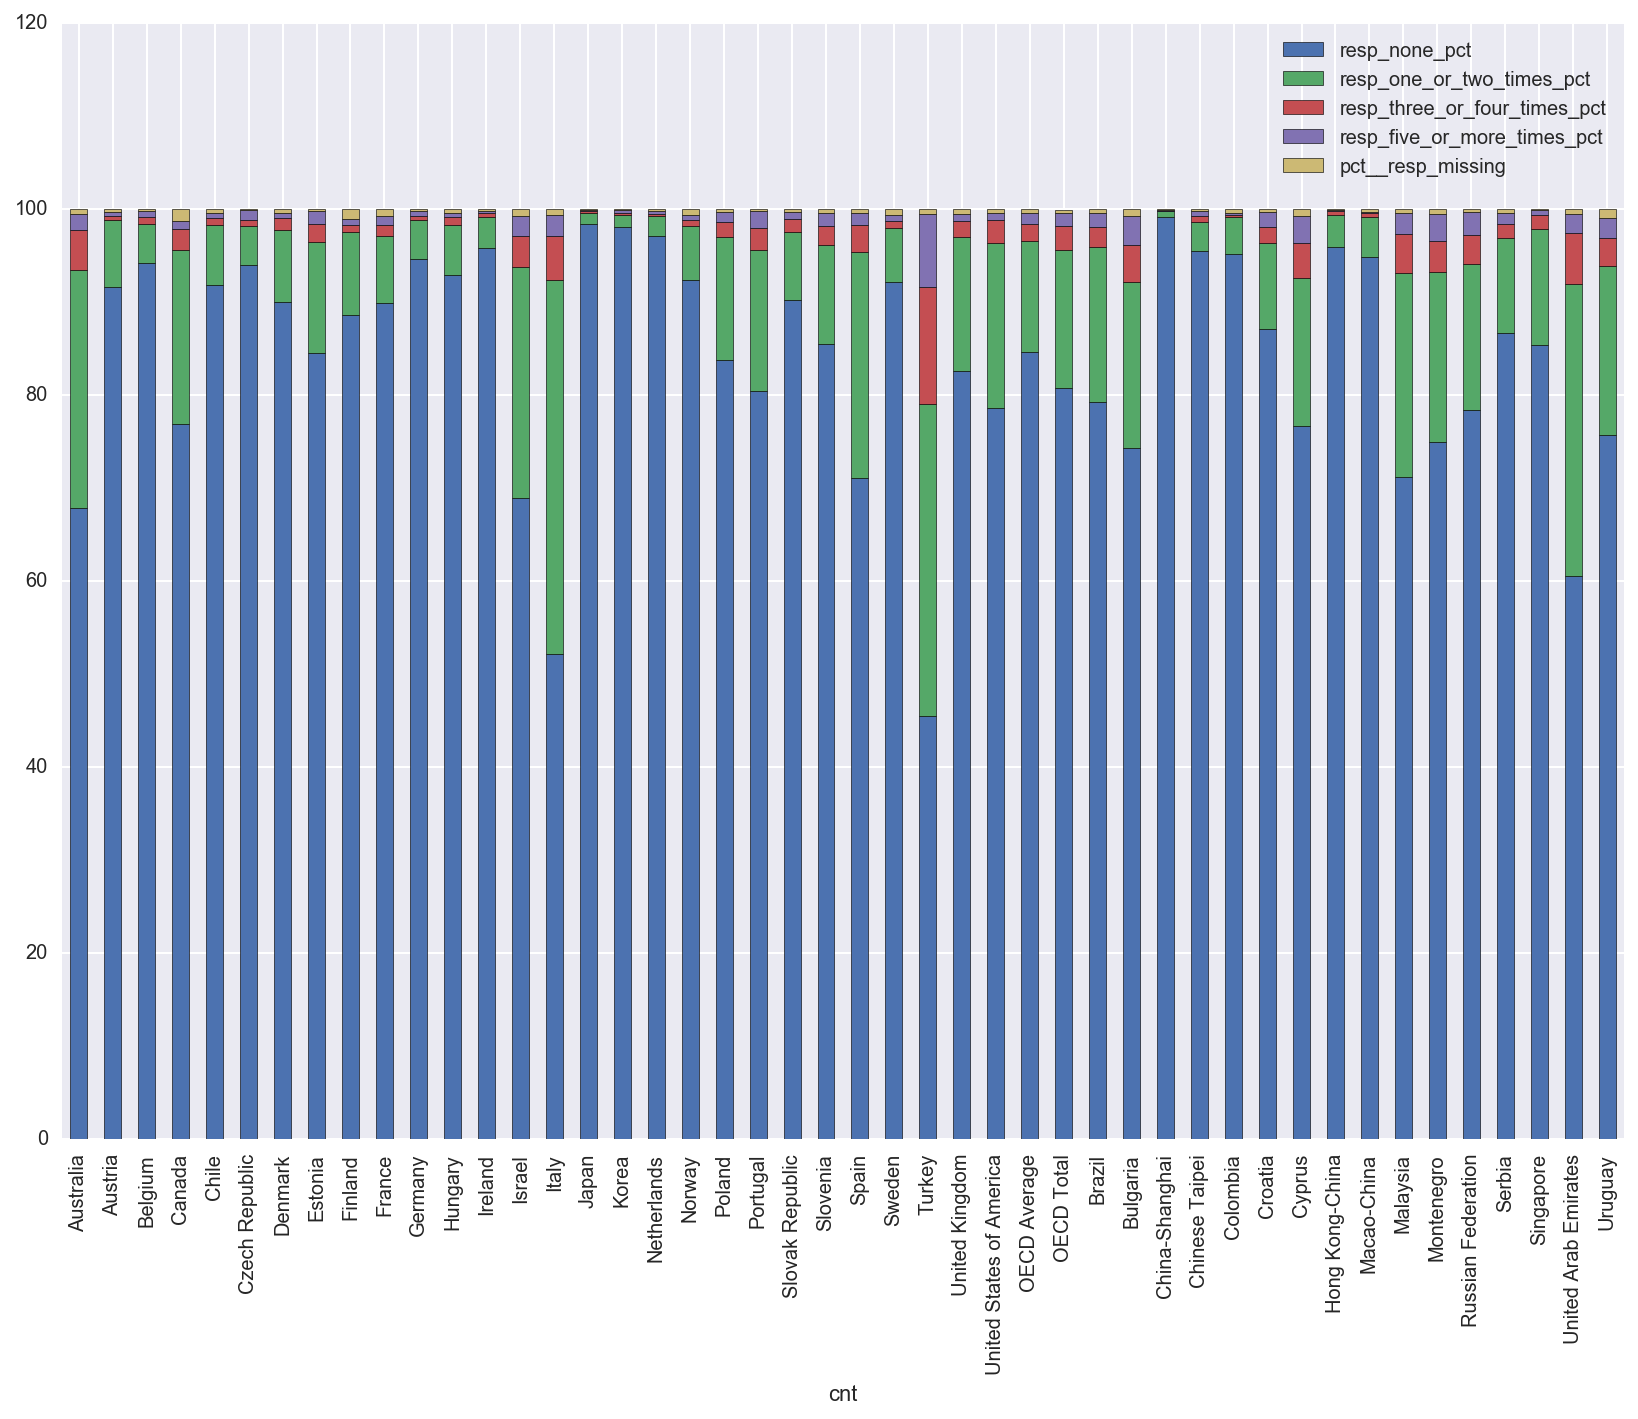

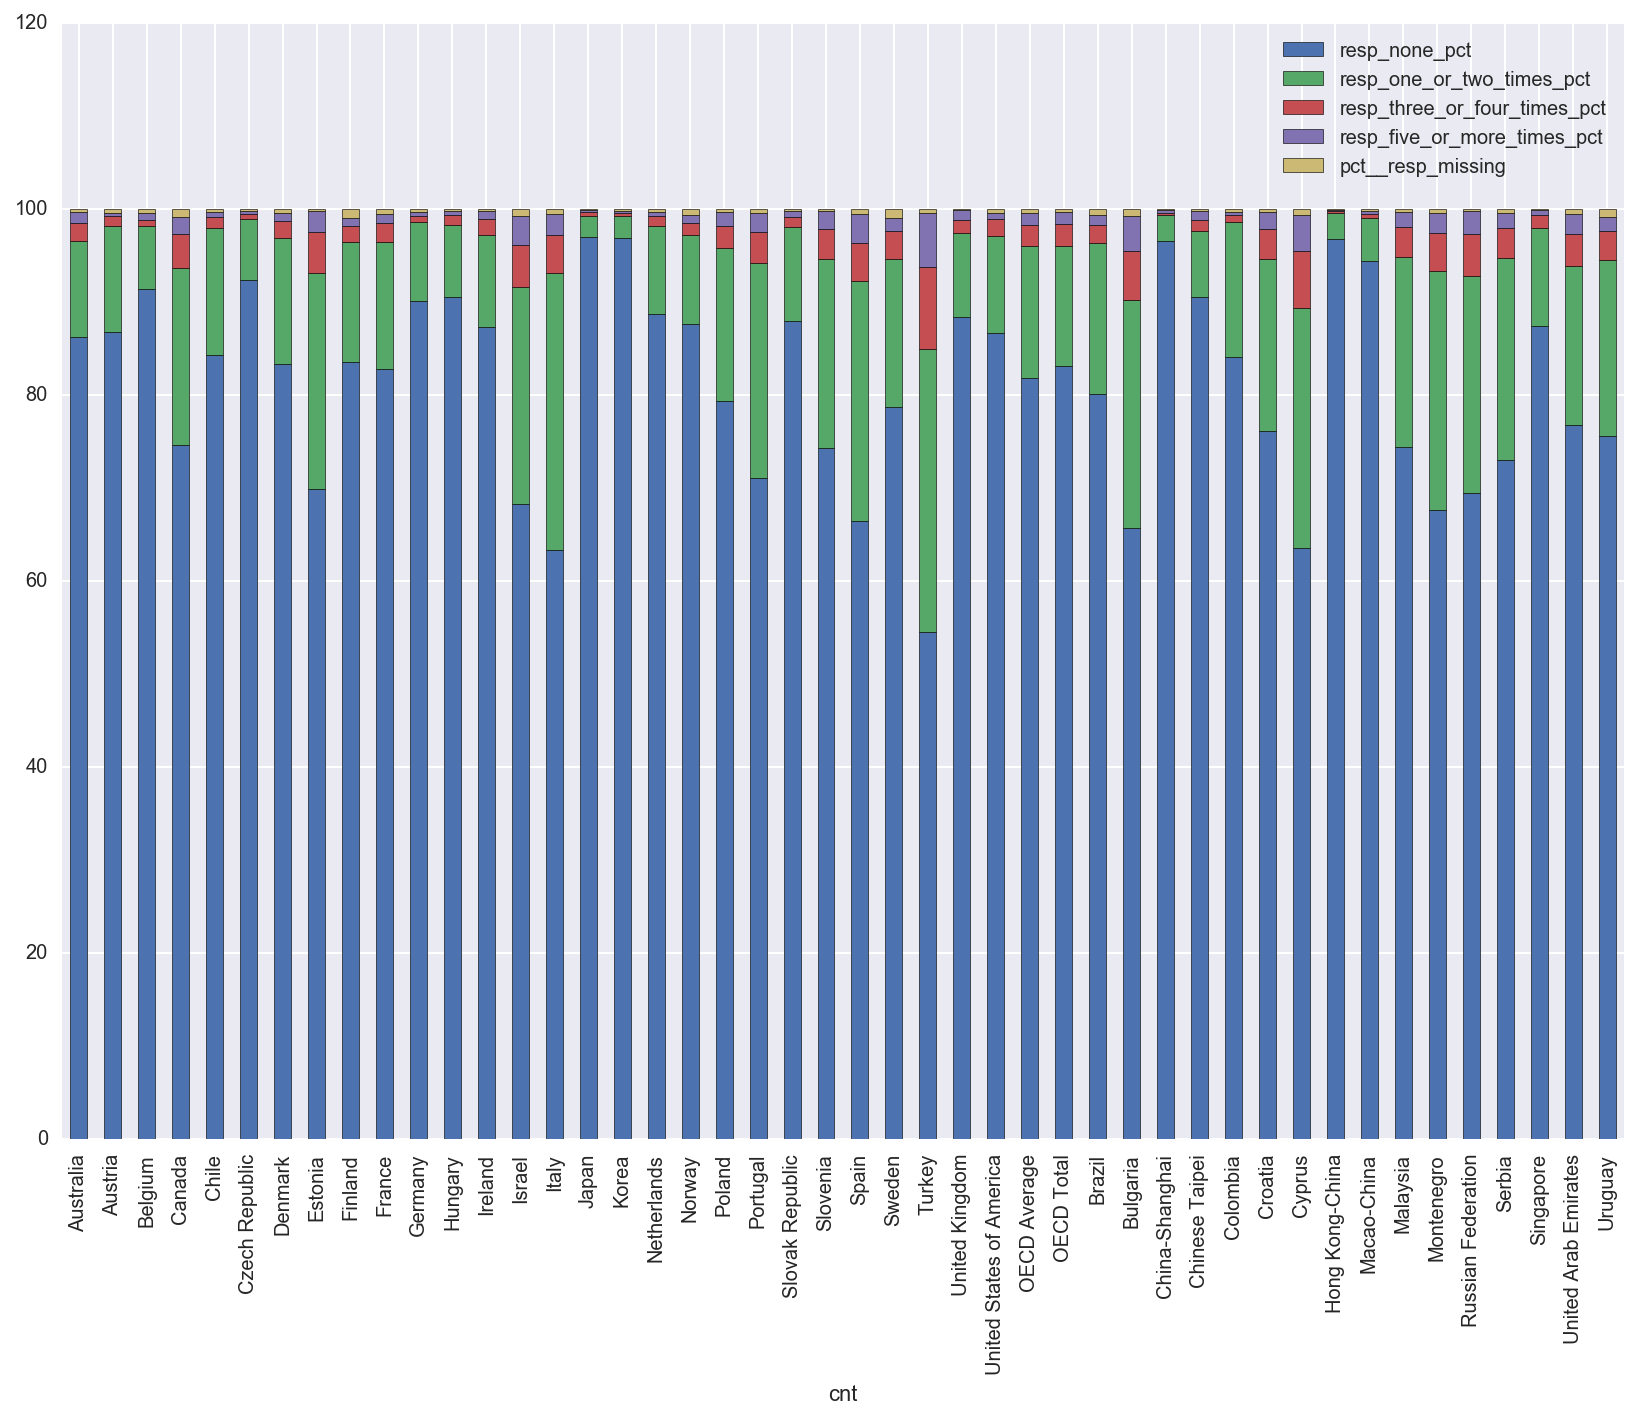

In [26]:
for question, group_df in stu_late_skip.groupby('q_id'):
    print question
    
    plot_df = group_df[['cnt',
                        'resp_none_pct',
                        'resp_one_or_two_times_pct',
                        'resp_three_or_four_times_pct',
                        'resp_five_or_more_times_pct',
                        'pct__resp_missing']]
    plot_df.set_index('cnt')
    
    
    plot_df.plot.bar(x = 'cnt', stacked=True, figsize=(14,10));

In [16]:
for country, group_df in stu_late_skip.groupby('cnt'):
    print country, group_df
    
    df2 = stu_late_skip(np.random.rand(10, 4), 
                           columns=['resp_none_pct','resp_one_or_two_times_pct', 'resp_three_or_four_times_pct', 'resp_five_or_more_times_pct', 'pct__resp_missing'])
    df2.plot.bar();

Australia          cnt  resp_none_pct  resp_one_or_two_times_pct  \
1  Australia      64.213245                  25.310420   
1  Australia      67.892559                  25.563343   
1  Australia      86.256075                  10.409040   

   resp_three_or_four_times_pct  resp_five_or_more_times_pct  \
1                      6.574601                     3.522818   
1                      4.313964                     1.787127   
1                      1.849189                     1.219645   

   pct__resp_missing      q_id  
1           0.378915   ST08Q01  
1           0.443006   ST09Q01  
1           0.266050  ST115Q01  


TypeError: 'DataFrame' object is not callable

In [21]:
stu_late_skip.corr()[0:9]

,resp_none_pct,resp_one_or_two_times_pct,resp_three_or_four_times_pct,resp_five_or_more_times_pct,pct__resp_missing
resp_none_pct,1.000000,-0.985097,-0.955413,-0.908230,-0.381322
resp_one_or_two_times_pct,-0.985097,1.000000,0.893263,0.827097,0.367497
resp_three_or_four_times_pct,-0.955413,0.893263,1.000000,0.967207,0.345372
resp_five_or_more_times_pct,-0.908230,0.827097,0.967207,1.000000,0.311175
pct__resp_missing,-0.381322,0.367497,0.345372,0.311175,1.000000


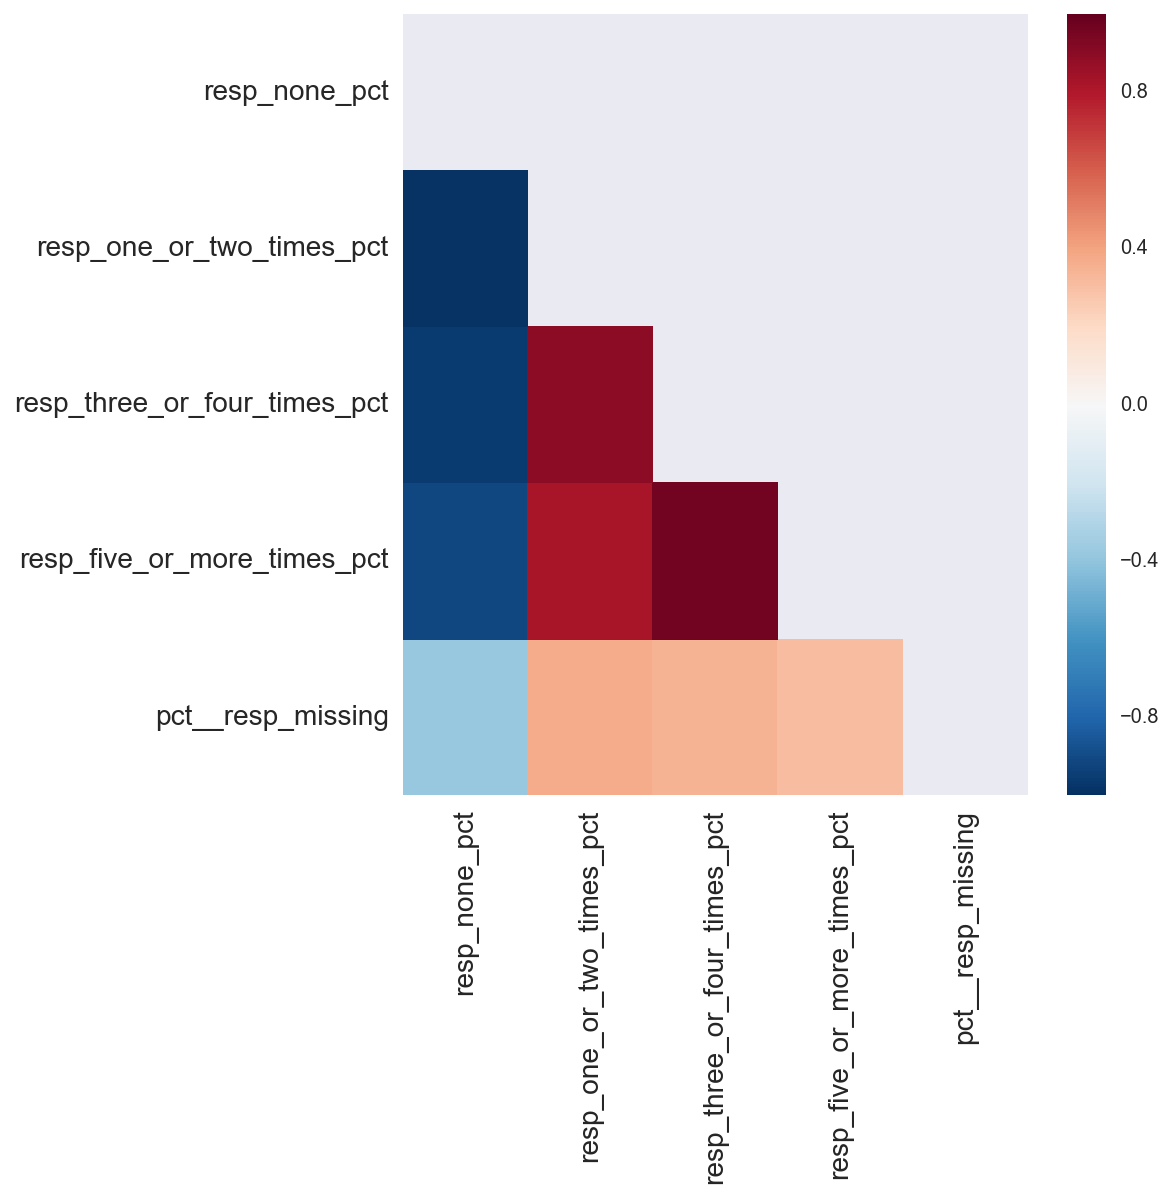

In [22]:
corrs = stu_late_skip.corr()[0:9]

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(7,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

# Make this your binary to compare everything to.

## Make resp_none_pct == 0 and the rest == 1

In [23]:
for resp in stu_late_skip:
    if resp_none_pct:
        return 0
    else:
        return 1

SyntaxError: 'return' outside function (<ipython-input-23-6b09283a8bb2>, line 3)

# Loading in Q29 from students questionaire.

In [24]:
# ST55Q01 - "Out of school lessons - <test lang>"

ST55Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q01.xls', 
                        skiprows = 1)

# ST55Q02 - "Out of school lessons - <maths>"

ST55Q02 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q02.xls', 
                        skiprows = 1)

# ST55Q03 - "Out of school lessons - <science>"

ST55Q03 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q03.xls',
                        skiprows = 1)

# ST55Q04,"Out of school lessons - other"

ST55Q04 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q04.xls',
                        skiprows = 1)



## Cleaning headers and column values

In [25]:
for w in ST55Q01.columns:
    ST55Q01 = ST55Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for w in ST55Q01:
        ST55Q01 = ST55Q01[ST55Q01.no_of_valid_resp != 'Valid']     
        
# Drop empty rows

ST55Q01.dropna()

# Delete all Standard Error columns

del ST55Q01['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se']
del ST55Q01['resp_less_than_2_hours_a_week_se']
del ST55Q01['resp_2_or_more_but_less_than_4_hours_a_week_se']
del ST55Q01['resp_4_or_more_but_less_than_6_hours_a_week_se'] 
del ST55Q01['resp_6_or_more_hours_a_week_se']
del ST55Q01['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST55Q01['total_number_of_resp']
del ST55Q01['pct_not_valid']
del ST55Q01['no_of_valid_resp']


In [26]:
for x in ST55Q02.columns:
    ST55Q02 = ST55Q02.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for x in ST55Q02:
        ST55Q02 = ST55Q02[ST55Q02.no_of_valid_resp != 'Valid']     
        
# Drop empty rows

ST55Q02.dropna()

# Delete all Standard Error columns

del ST55Q02['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se']
del ST55Q02['resp_less_than_2_hours_a_week_se']
del ST55Q02['resp_2_or_more_but_less_than_4_hours_a_week_se']
del ST55Q02['resp_4_or_more_but_less_than_6_hours_a_week_se'] 
del ST55Q02['resp_6_or_more_hours_a_week_se']
del ST55Q02['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST55Q02['total_number_of_resp']
del ST55Q02['pct_not_valid']
del ST55Q02['no_of_valid_resp']

In [27]:
ST55Q02.head()

,cnt,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_less_than_2_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_6_or_more_hours_a_week_pct,pct__resp_missing
1,Australia,71.5562,15.1866,7.38768,3.00805,1.06131,1.80024
2,Austria,75.122,14.116,6.21911,1.57452,0.647814,2.32056
3,Belgium,63.9909,15.3721,11.7959,5.27329,1.30958,2.25819
4,Canada,71.344,13.8131,7.73706,3.24604,1.95283,1.90693
5,Chile,61.2728,14.4196,8.09995,7.00269,7.43808,1.76687


In [28]:
for y in ST55Q03.columns:
    ST55Q03 = ST55Q03.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for y in ST55Q03:
        ST55Q03 = ST55Q03[ST55Q03.no_of_valid_resp != 'Valid']     
        
# Drop empty rows

ST55Q03.dropna()

# Delete all Standard Error columns

del ST55Q03['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se']
del ST55Q03['resp_less_than_2_hours_a_week_se']
del ST55Q03['resp_2_or_more_but_less_than_4_hours_a_week_se']
del ST55Q03['resp_4_or_more_but_less_than_6_hours_a_week_se'] 
del ST55Q03['resp_6_or_more_hours_a_week_se']
del ST55Q03['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST55Q03['total_number_of_resp']
del ST55Q03['pct_not_valid']
del ST55Q03['no_of_valid_resp']

In [29]:
ST55Q03.head()

,cnt,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_less_than_2_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_6_or_more_hours_a_week_pct,pct__resp_missing
1,Australia,82.5763,8.0001,4.34922,1.86991,0.885964,2.31853
2,Austria,91.7267,3.2389,1.31369,0.348412,0.285582,3.0867
3,Belgium,72.7869,11.8825,8.5825,2.65986,1.02277,3.06542
4,Canada,78.5346,9.60901,5.64888,2.42004,1.61387,2.17362
5,Chile,69.9227,11.2308,9.50337,4.23436,2.99416,2.11466


In [30]:
for z in ST55Q04.columns:
    ST55Q04 = ST55Q04.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for z in ST55Q04:
        ST55Q04 = ST55Q04[ST55Q04.no_of_valid_resp != 'Valid']     
        
# Drop empty rows

ST55Q04.dropna()

# Delete all Standard Error columns

del ST55Q04['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se']
del ST55Q04['resp_less_than_2_hours_a_week_se']
del ST55Q04['resp_2_or_more_but_less_than_4_hours_a_week_se']
del ST55Q04['resp_4_or_more_but_less_than_6_hours_a_week_se'] 
del ST55Q04['resp_6_or_more_hours_a_week_se']
del ST55Q04['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST55Q04['total_number_of_resp']
del ST55Q04['pct_not_valid']
del ST55Q04['no_of_valid_resp']

In [31]:
Q29 = ST55Q01.append(ST55Q02).append(ST55Q03).append(ST55Q04)

In [32]:
Q29_groupby = Q29.groupby('cnt')

In [33]:
ST55Q01['q_id'] = 'ST55Q01'
ST55Q01['q_id'] = 'ST55Q02'
ST55Q01['q_id'] = 'ST55Q03'
ST55Q01['q_id'] = 'ST55Q04'

for col in Q29.columns:
    if not col in ['cnt','q_id']:
        Q29[col] = Q29[col].map(lambda x: float(x))

In [34]:
Q29.head()

,cnt,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_less_than_2_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_6_or_more_hours_a_week_pct,pct__resp_missing
1,Australia,78.660336,11.158062,5.073691,2.272912,0.949135,1.885864
2,Austria,89.509702,5.264255,2.125891,0.507020,0.299853,2.293279
3,Belgium,74.044960,12.202727,6.565419,4.129074,0.643246,2.414576
4,Canada,78.597626,9.907047,4.999591,2.455173,1.820856,2.219707
5,Chile,70.711599,9.120817,4.895709,6.322367,6.815622,2.133886


In [35]:
Q29_groupby.corr()

pct__resp_missing  \
cnt                                                                                              
Australia                pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct              0.241318   
                         resp_4_or_more_but_less_than_6_hours_a_week_pct              0.489976   
                         resp_6_or_more_hours_a_week_pct                              0.878119   
                         resp_i_do_not_attend_out_of_school_time_lessons...          -0.163612   
                         resp_less_than_2_hours_a_week_pct                           -0.412177   
Austria                  pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct             -0.508764   
                         resp_4_or_more_but_less_than_6_hours_a_week_pct             -0.472212   
                         resp_6_or_more_hours_a_week_pct                             -0.221381   
                         resp_i_do_not_attend_out_of_school_time_lessons...           0.410099   
                         resp_less_than_2_hours_a_week_pct                           -0.426878   
Belgium                  pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct              0.008832   
                         resp_4_or_more_but_less_than_6_hours_a_week_pct             -0.818009   
                         resp_6_or_more_hours_a_week_pct                              0.730472   
                         resp_i_do_not_attend_out_of_school_time_lessons...           0.028525   
                         resp_less_than_2_hours_a_week_pct                           -0.391354   
Brazil                   pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct             -0.589043   
                         resp_4_or_more_but_less_than_6_hours_a_week_pct             -0.910581   
                         resp_6_or_more_hours_a_week_pct                              0.318050   
                         resp_i_do_not_attend_out_of_school_time_lessons...          -0.147216   
                         resp_less_than_2_hours_a_week_pct                            0.986929   
Bulgaria                 pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct              0.816135   
                         resp_4_or_more_but_less_than_6_hours_a_week_pct              0.936100   
                         resp_6_or_more_hours_a_week_pct                             -0.168843   
                         resp_i_do_not_attend_out_of_school_time_lessons...          -0.858395   
                         resp_less_than_2_hours_a_week_pct                            0.331767   
...                                                                                        ...   
Turkey                   pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct             -0.646342   
                         resp_4_or_more_but_less_than_6_hours_a_week_pct             -0.578933   
                         resp_6_or_more_hours_a_week_pct                              0.559777   
                         resp_i_do_not_attend_out_of_school_time_lessons...           0.412073   
                         resp_less_than_2_hours_a_week_pct                           -0.469106   
United Arab Emirates     pct__resp_missing                                            1.000000   
                         resp_2_or_more_but_less_than_4_hours_a_week_pct              0.047349   
                         resp_4_or_more_but_less_than_6_hou

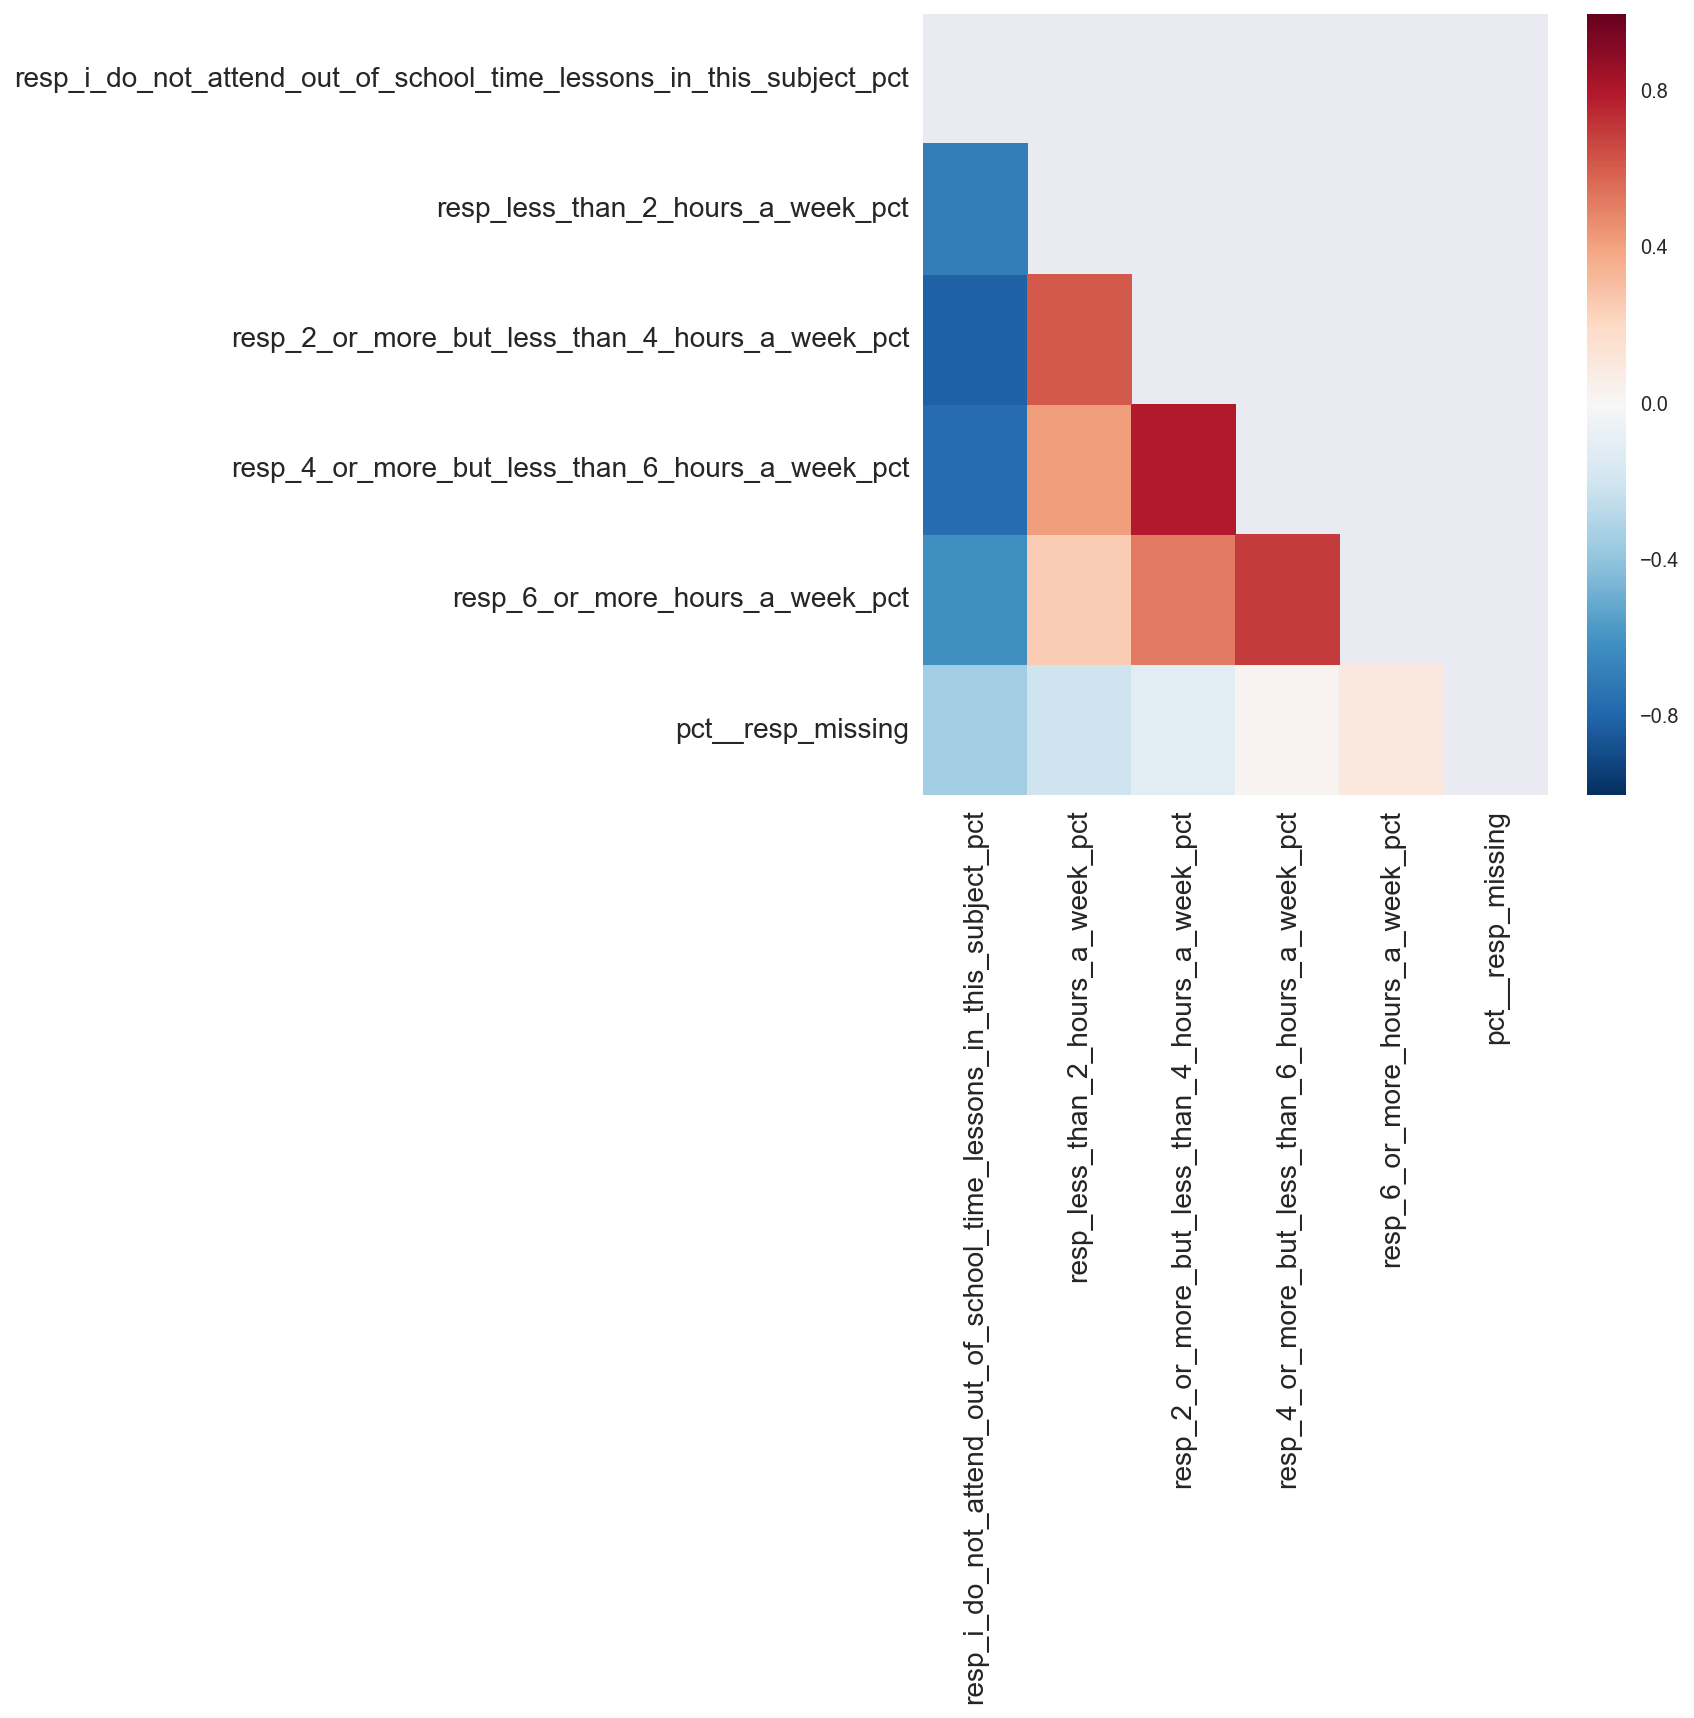

In [36]:
corrs = Q29.corr()[0:9]

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(7,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

# Loading in Q30
Thinking about all school subjects: on average, how many hours do you spend each week on the following?

In [ ]:
for x in ST55Q04.columns:
    ST55Q04 = ST55Q04.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for x in ST55Q04:
        ST55Q04 = ST55Q04[ST55Q04.no_of_valid_resp != 'Valid']     
        
# Drop empty rows

ST55Q04.dropna()

# Delete all Standard Error columns

del ST55Q04['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se']
del ST55Q04['resp_less_than_2_hours_a_week_se']
del ST55Q04['resp_2_or_more_but_less_than_4_hours_a_week_se']
del ST55Q04['resp_4_or_more_but_less_than_6_hours_a_week_se'] 
del ST55Q04['resp_6_or_more_hours_a_week_se']
del ST55Q04['resp_missing_se']
        
# Delete Total number of resp, pct no valid and no of valid resp

del ST55Q04['total_number_of_resp']
del ST55Q04['pct_not_valid']
del ST55Q04['no_of_valid_resp']